<a href="https://colab.research.google.com/github/vdhinaka/PythonDeepDive/blob/master/Sequences/05%20-%20Slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Slicing

Only works with sequence types. 

- Mutable  Sequence  Types - Extract data, Assign data <br>
- Immutable Sequence Types - Extract data



In [1]:
a = [1, 2, 3, 4]
print(a[0:2])

[1, 2]


In [3]:
a[0:2] = ['a', 'b', 'c']
a

['a', 'b', 'c', 3, 4]

In [4]:
type(a[0:2])

list

Slices can actually be defined using the `slice()` function which creates a `slice` object:

In [6]:
s = slice(0, 2)

In [7]:
type(s)

slice

In [8]:
s.start

0

In [9]:
s.stop

2

In [13]:
type(a[0:2])

list

In [14]:
type(s)

slice

In [15]:
l = [1, 2, 3, 4, 5]
l[s]

[1, 2]

In [16]:
s

slice(0, 2, None)

In [17]:
a[2:1000]

['c', 3, 4]

In [18]:
a[-1]

4

In [19]:
a[-3:-1]

['c', 3]

In [26]:
a

['a', 'b', 'c', 3, 4]

In [27]:
a[-3:-1:-1]

[]

In [29]:
a[100:-5]

[]

In [30]:
a[-1:-5]

[]

In [32]:
a[-1:100]

[4]

In [31]:
a[-1:-5:-1]

[4, 3, 'c', 'b']

#### Step Value
[i : j] -> i <= k < j

- Step Value - Defaults to 1


In [20]:
s = ['a', 'b', 'c', 'd', 'e', 'f']
print( s[0:6:2] )
print( s[slice(0,6,2)] )

['a', 'c', 'e']
['a', 'c', 'e']


In [21]:
s[1:100:3]

['b', 'e']

In [22]:
s[-1:-4:-1]

['f', 'e', 'd']

Slices can be useful in practice to make code more readable.

Suppose you are parsing fixed-width file. You would need to define the start/end column of each field in the rows of the file.

So you might write something like this:

In [23]:
data = []  # a collection of rows, read from a file maybe
for row in data:
    first_name = row[0:51]
    last_name = row[51:101]
    ssn = row[101:111]
    # etc

Instead, you might write:

In [24]:
range_first_name = slice(0, 51)
range_last_name = slice(51, 101)
range_ssn = slice(101, 111)

These might even be defined in your global scope, or maybe a config file.

Then in your code you would write this instead:

In [25]:
for row in data:
    first_name = row[range_first_name]
    last_name = row[range_last_name]
    ssn = row[range_ssn] 

Separating the slice definition from the code that uses the slice makes it now much easier to update your slice definitions in one place, rather than hunt for them all over the place.

#### Slice Fundamentals

Indexing is zero-based in Python, and slices are inclusive of their start-index, and exclusive of their end-index:

In [ ]:
l = 'python'
l[0:1], l[0:6]

('p', 'python')

Additionally, extended slicing allows specifying a step value:

In [37]:
l = 'python'
l[0:6:2], l[0:6:3]

('pto', 'ph')

In [38]:
type(l), type(l[0:3])

(str, str)

And extended slices can also be defined using `slice`:

In [ ]:
s1 = slice(0, 6, 2)
s2 = slice(0, 6, 3)
l[s1], l[s2]

('pto', 'ph')

Unlike regular indexing (e.g. `l[n]`), it's OK for slice indexes to be "out of bounds":

In [40]:
l = [1, 2, 3, 4, 5, 6]
l[0:100]

[1, 2, 3, 4, 5, 6]

In [41]:
l[-10:100]

[1, 2, 3, 4, 5, 6]

In [42]:
l[100:-10:-1]

[6, 5, 4, 3, 2, 1]

But regular indexing will raise exceptions for out of bound errors:

In [43]:
l = [1, 2, 3, 4, 5, 6]
l[100]

IndexError: ignored

In slicing, if we do not specify the start/end index, Python will automatically use the start/end of the sequence we are slicing:

In [ ]:
l = [1, 2, 3, 4, 5, 6]

In [ ]:
l[:4]

[1, 2, 3, 4]

In [ ]:
l[4:]

[5, 6]

In fact, we can omit both:

In [ ]:
l[:]

[1, 2, 3, 4, 5, 6]

In addition to the start/stop values allowing for negative values, the step value can also be negative. This simply means the sequence will traversed in the opposite direction:

In [ ]:
l = [0, 1, 2, 3, 4, 5]

In [ ]:
l[3:0:-1]

[3, 2, 1]

Basically we started at `3` (inclusive) and went in steps of `-1`, ending at (but not including) `0`.

If we wanted to include the `0` index element, we could do it by ommitting the end value:

In [ ]:
l[3::-1]

[3, 2, 1, 0]

We could also do the following:

In [ ]:
l[3:-100:-1]

[3, 2, 1, 0]

But this would not work as expected:

In [ ]:
l[3:-1:-1]

[]

Why?

Remember from the lecture that this range equivalence would be:

`3 --> 3`

`-1 < 0 --> max(-1, 6-1) --> max(-1, 5) --> 5`

so equivalent range would be given by:

In [ ]:
list(range(3, 5, -1))

[]

which of course is an empty range!

#### Easily Converting a Slice to a Range

Any slice essentially defines a sequence of indices that is used to select elements for another sequence.

Slices are defined independently of the sequecne being sliced.

We can easily determine the effective range of a slice by using the `indices` method in the `slice` object. The only thing is that in order to do this we must know the length of the sequence we are slicing.

For example, if our list has a length of 10:

In [ ]:
slice(1, 5).indices(10)

(1, 5, 1)

In [ ]:
list(range(1, 5, 1))

[1, 2, 3, 4]

In [ ]:
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l[1:5]

[1, 2, 3, 4]

The `slice` object can also handle extended slicing:

In [ ]:
slice(0, 100, 2).indices(10)

(0, 10, 2)

In [ ]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [ ]:
l[0:100:2]

[0, 2, 4, 6, 8]

We can easily retrieve a list of indices from a slice by passing the unpacked tuple returned by the `indices` method to the range function's arguments and converting to a list:

In [ ]:
list(range(*slice(None, None, -1).indices(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

As we can see from this example, using a slice such as `[::-1]` returns a sequence that is in reverse order from the original one.

In [ ]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
l[::]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
l[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

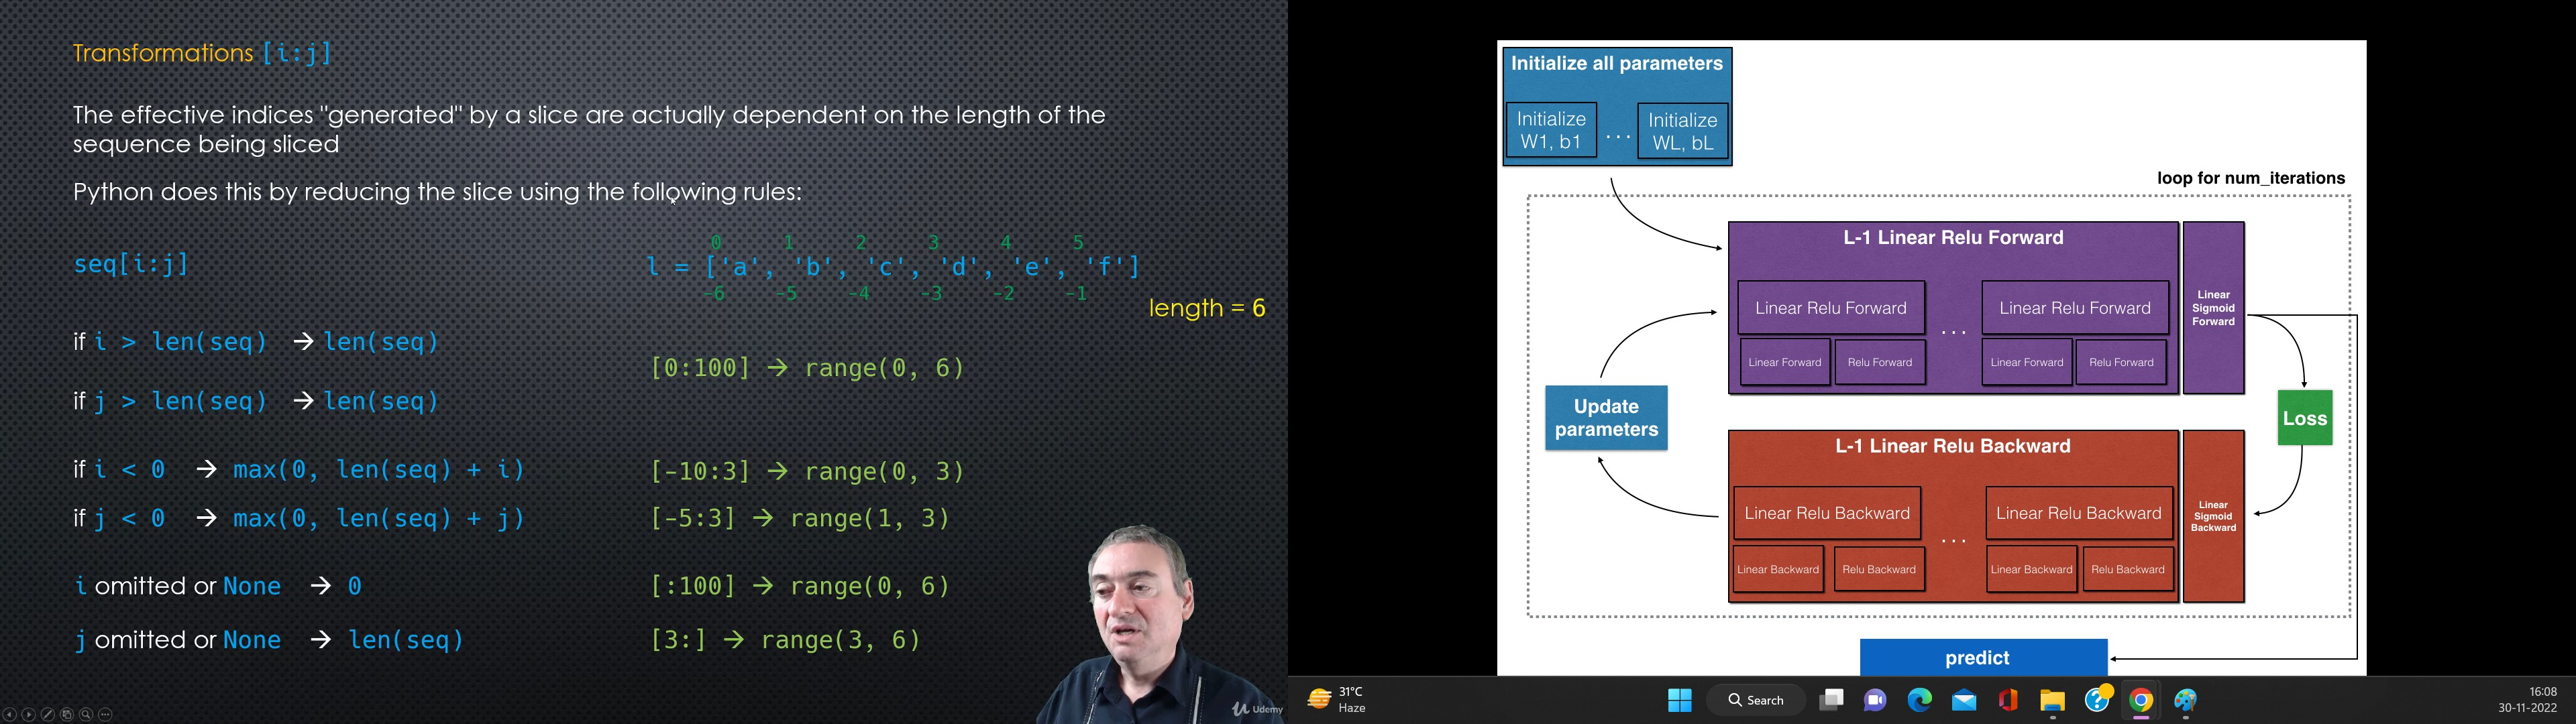

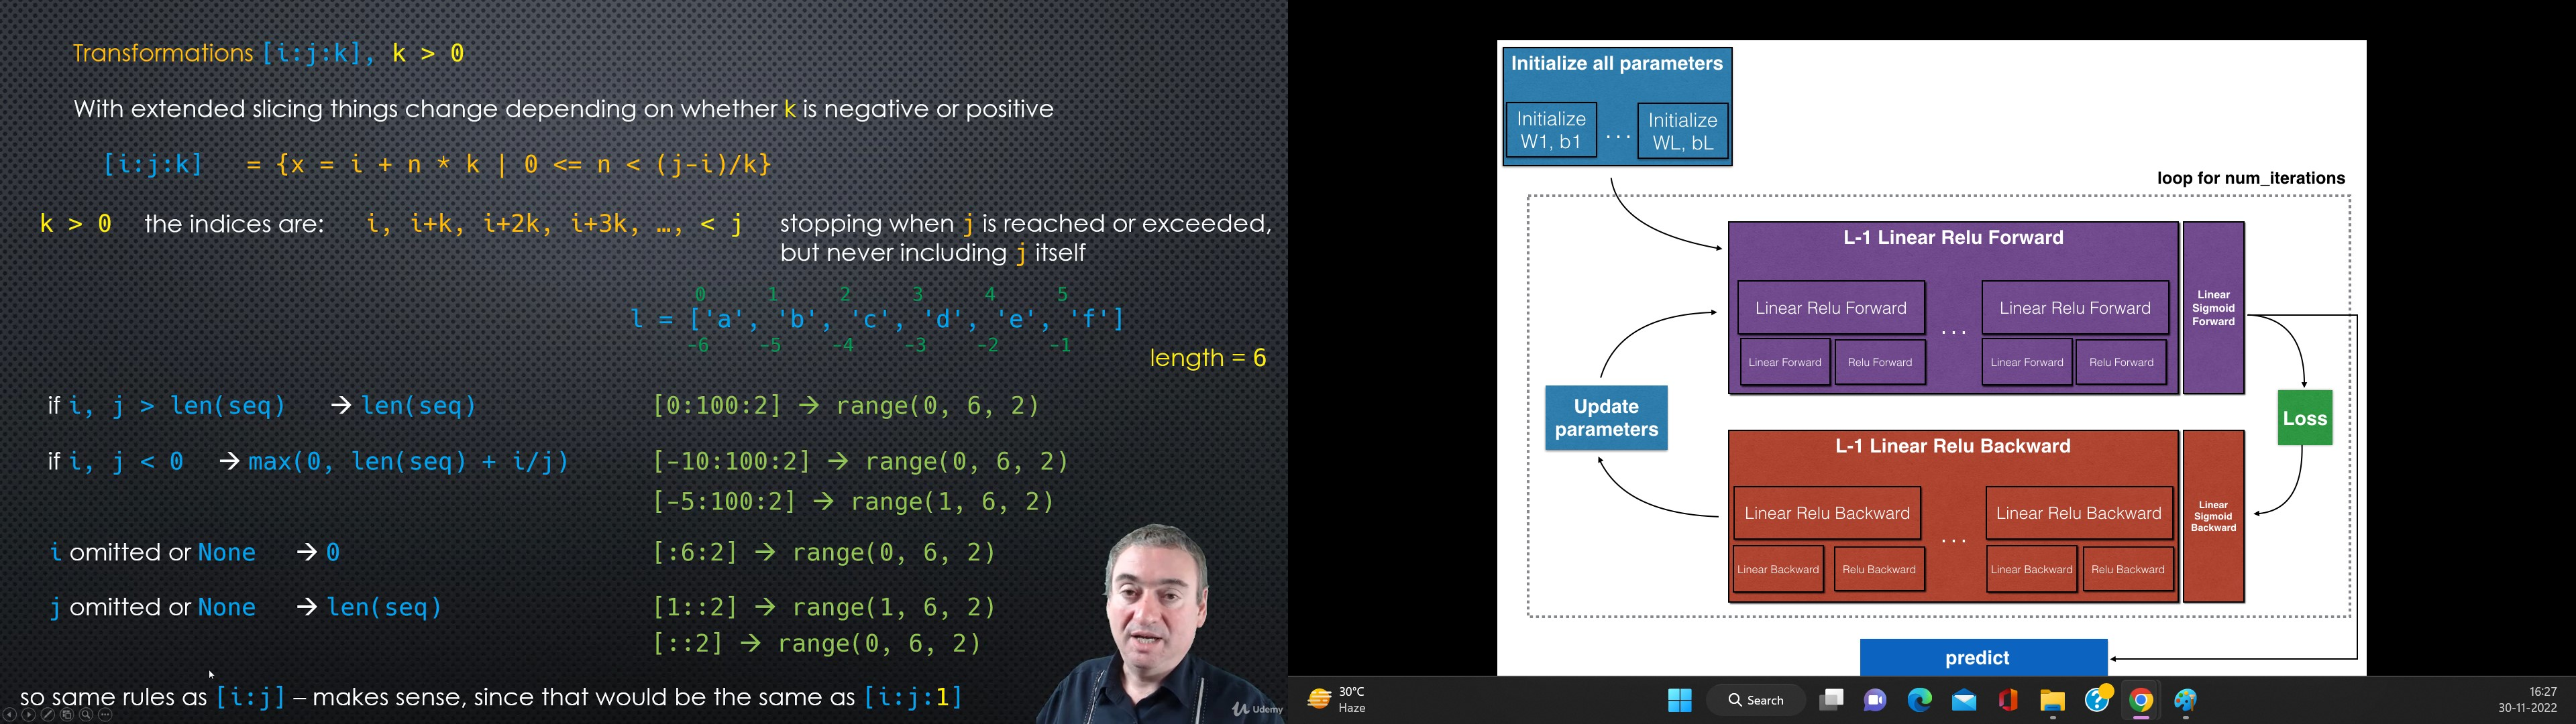

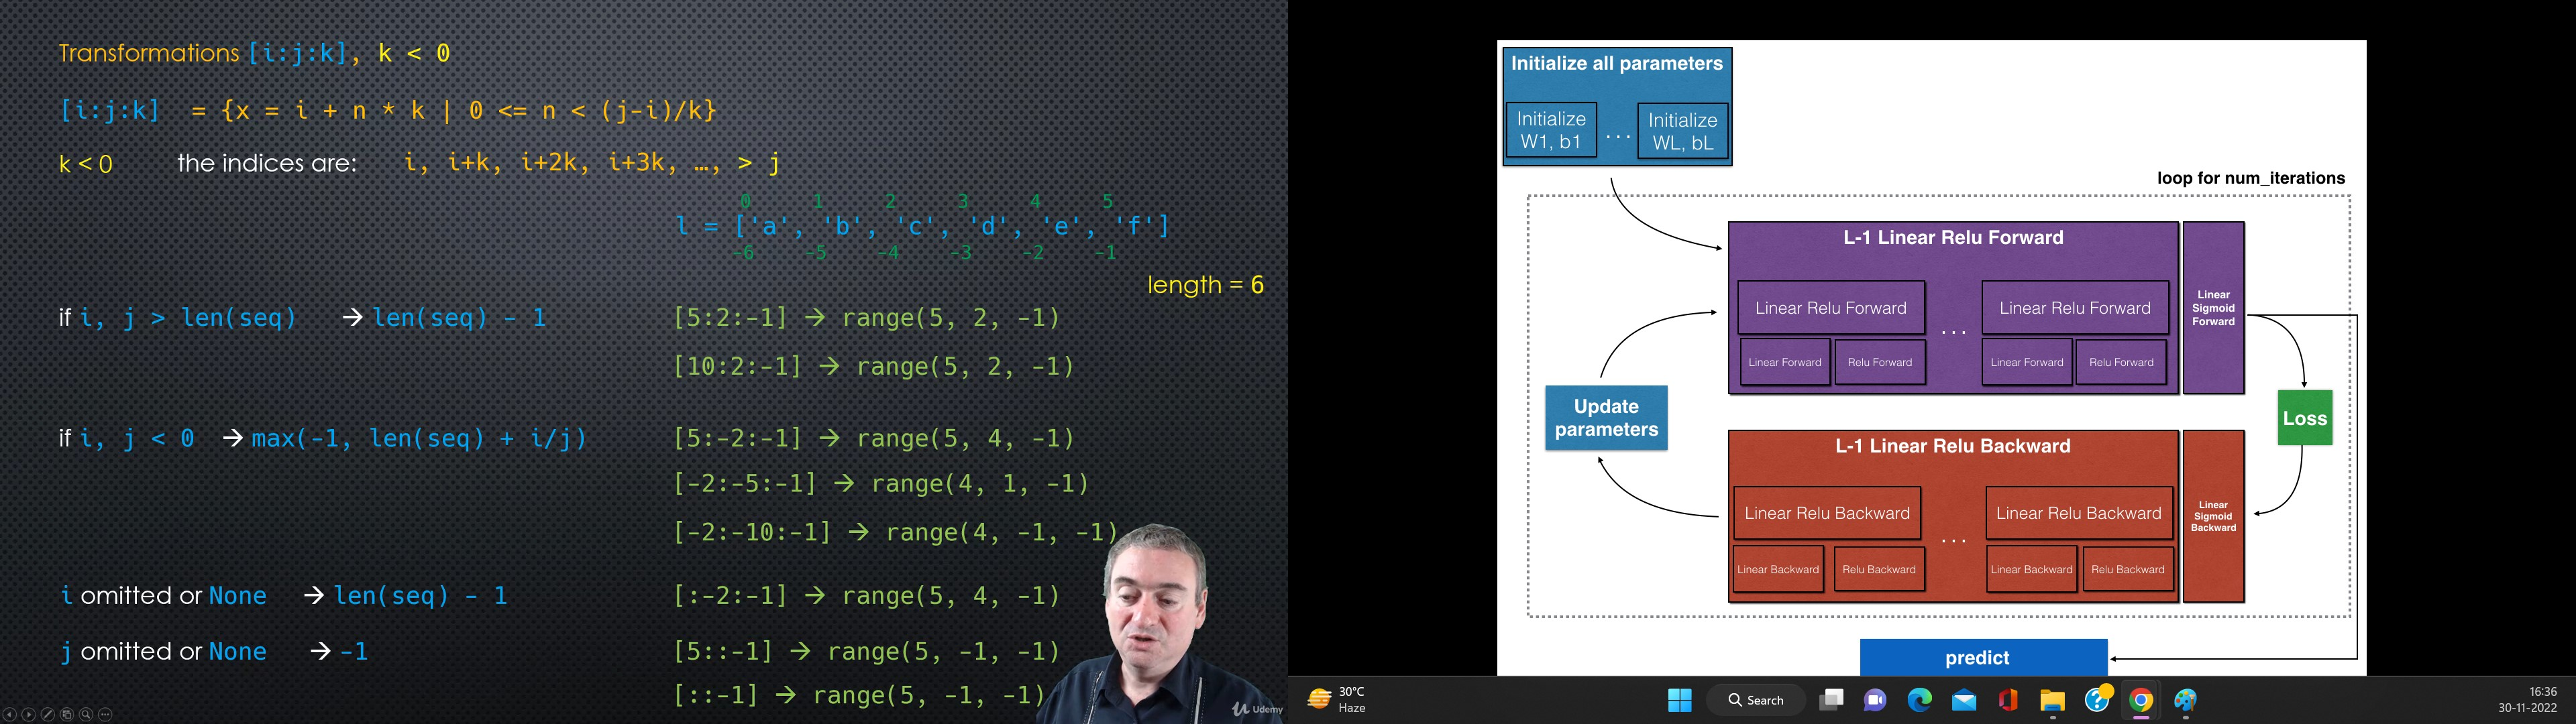

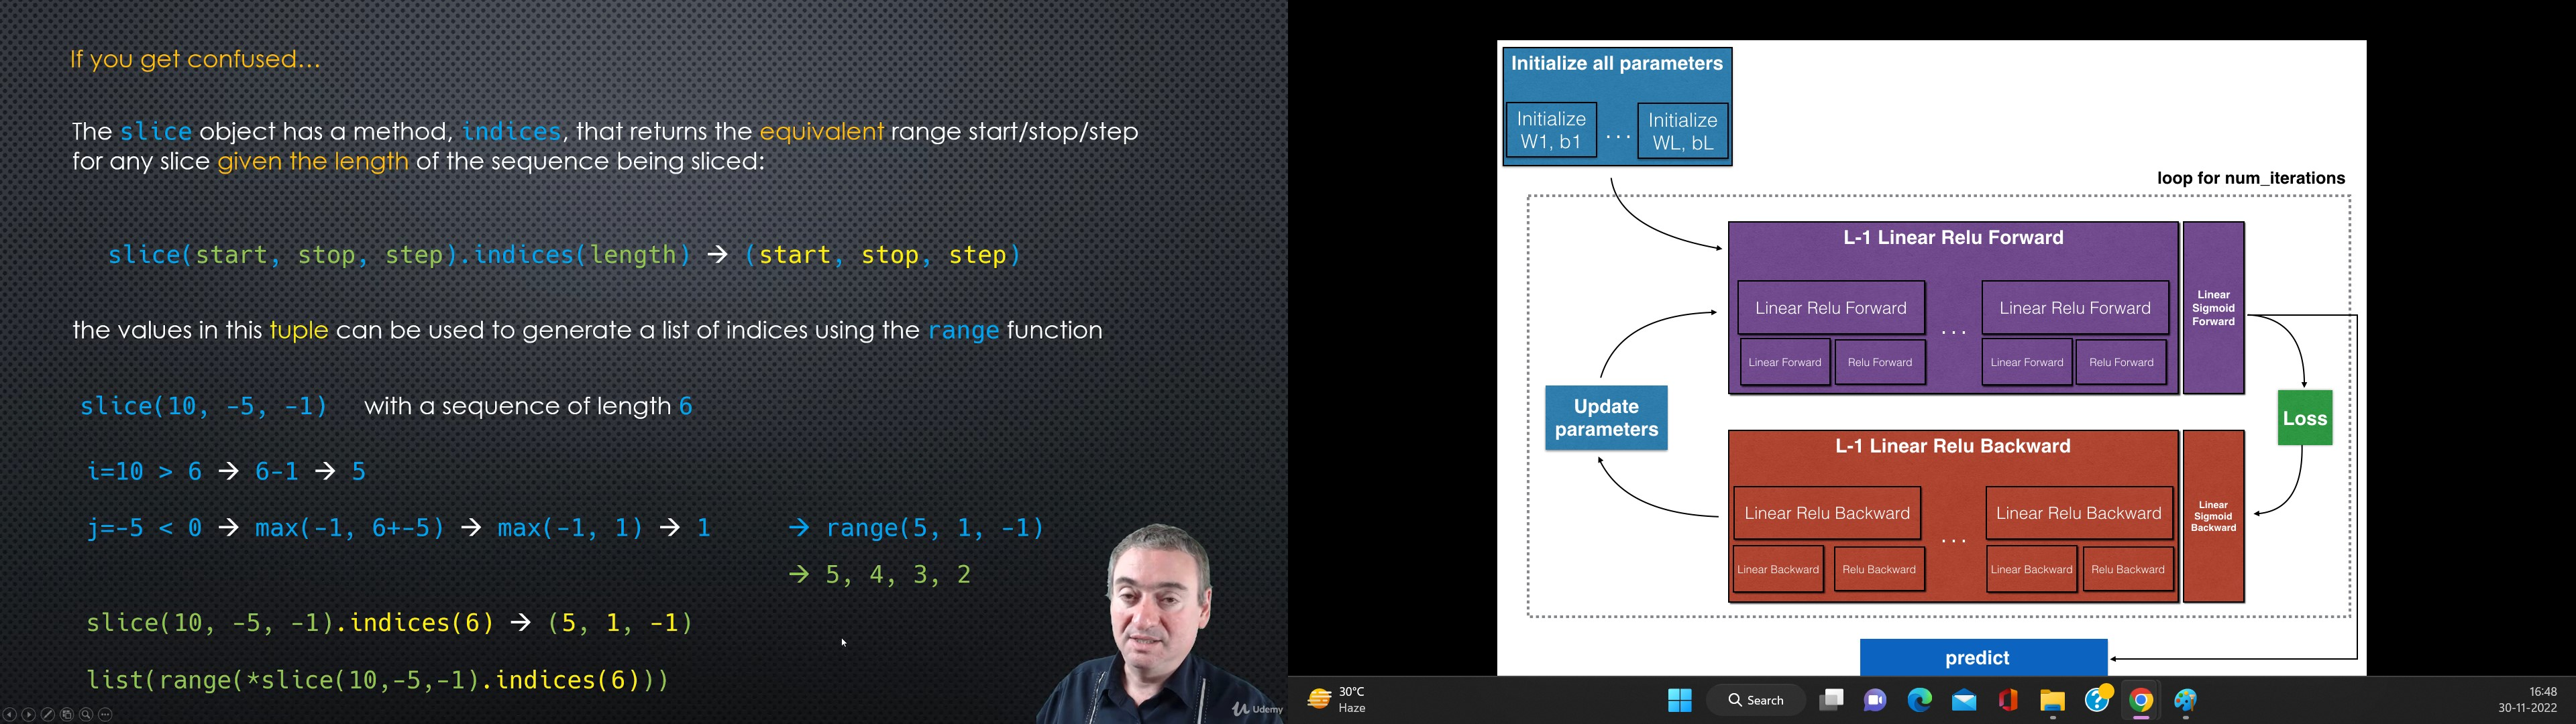